Métodos de ensamble
==================

Todos los modelos de aprendizaje automático tienen un problema de equilibrio entre bias y varianza. El término bias se refiere a la diferencia entre la predicción del modelo y el valor real. La varianza se refiere a cuánto cambia el modelo dependiendo de los datos de entrenamiento. Un modelo con alto bias tiende a predecir mal los valores reales, mientras que un modelo con alta varianza tiende a predecir valores muy diferentes para un mismo valor de entrada. 
Cuando la complejidad del modelo aumenta, este dispone de mayor flexibilidad para adaptarse a las obbservaciones, reduciendo así el bias y mejorando las predicciones. Sin embargo, después de un cierto grado de flexibilidad, aparece el overfitting, es decir, el modelo es incapaz de generalizar a nuevos datos. Es aquí donde el ensamblado puede ayudar.

El ensamblado es una técnica de aprendizaje automático para combinar distintos modelos para mejorar la precisión predictiva, logrando un equilibrio entre bias y varianza. Los dos tipos de ensamble más usados son:

* Bagging: se ajustan múltiples modelos independientes a subconjuntos de los datos de entrenamiento. El resultado final es la media de los resultados de los modelos individuales.

<center>

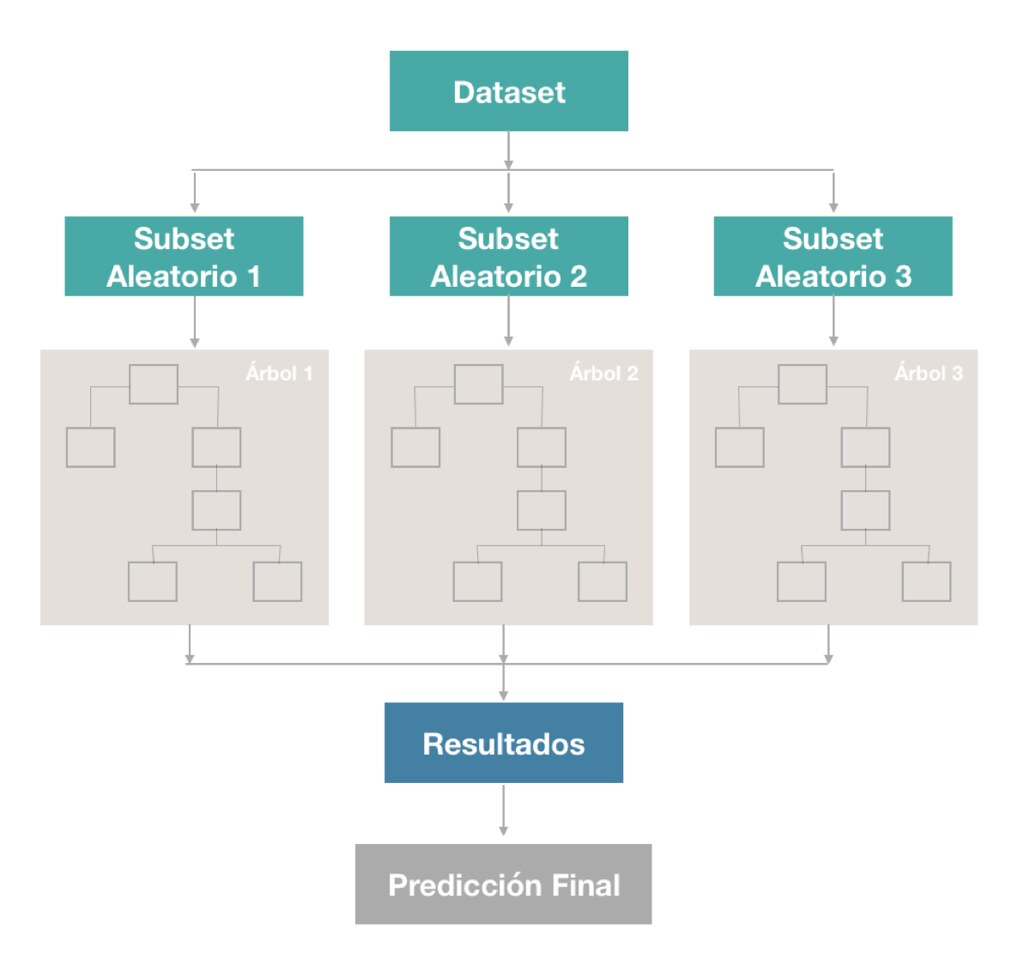

</center>

* Boosting: se ajustan múltiples modelos secuenciales, cada uno de los cuales intenta corregir los errores del modelo anterior. El resultado final es la suma de los resultados de los modelos individuales.

<center>

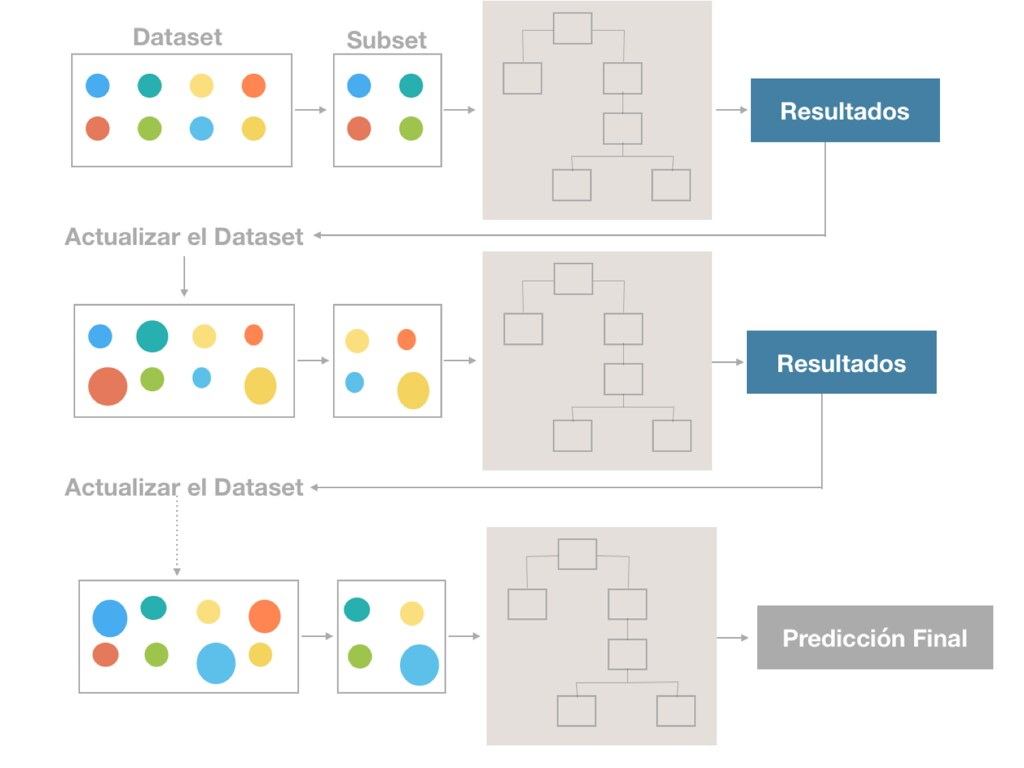

</center>

Implementación Bagging
======================

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [3]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

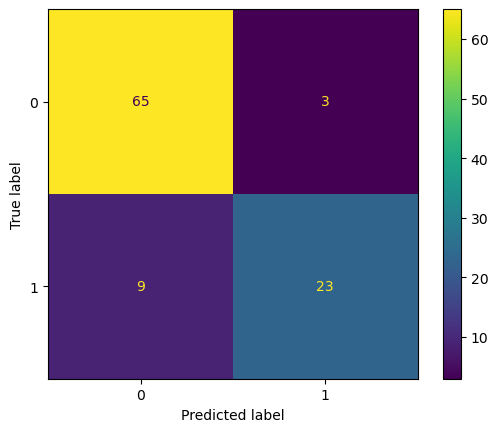

In [4]:
# Entrenamos el modelo
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)
bagging.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = bagging.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


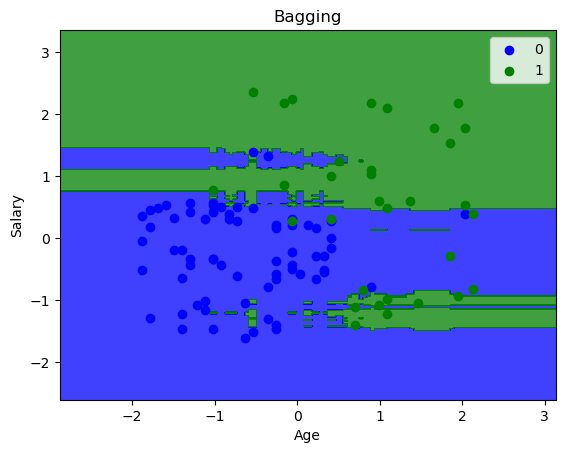

In [5]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, bagging.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Bagging')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

Implementación Boosting
=======================

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [7]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

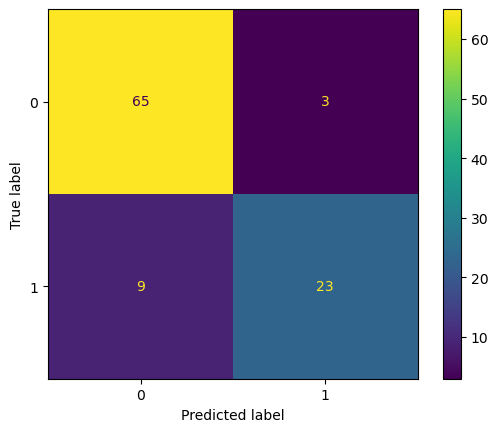

In [8]:
# Entrenamos el modelo
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
gbc.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = bagging.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


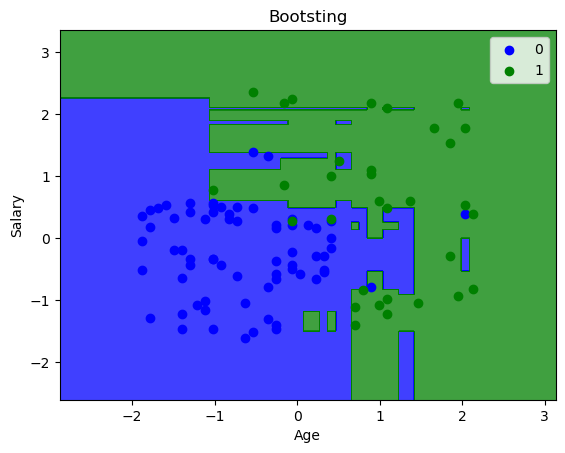

In [9]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, gbc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Bootsting')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

Rerefencias:

https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html

https://aprendeia.com/metodos-de-ensamble-de-modelos-machine-learning-ensemble-methods-en-espanol/#:~:text=Los%20m%C3%A9todos%20de%20ensamble%20de,para%20resolver%20un%20problema%20particular.